In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import scipy as sp
import pandas as pd
import statsmodels.stats.diagnostic as sm

In [3]:
dados = sc.loadmat('simcosta_SP1_2048.mat')
S = dados['S']
T = dados['T']
DO = dados['DO']
CDOM = dados['CDOM']
t = dados['t']
turb = dados['Turb']
chla = dados['chla']
plt.style.use('ggplot')


In [4]:
Si = S[0,:]
Si = pd.Series(Si).interpolate().values

Ti = T[0,:]
Ti = pd.Series(Ti).interpolate().values

DOi = DO[0,:]
DOi = pd.Series(DOi).interpolate().values

CDOMi = CDOM[0,:]
CDOMi = pd.Series(CDOMi).interpolate().values

turbi = turb[0,:]
turbi = pd.Series(turbi).interpolate().values

chlai = chla[0,:]
chlai = pd.Series(chlai).interpolate().values


In [5]:
tempo = np.zeros_like(Si)
for i in range(2048):
   tempo[i] = tempo[i]+i

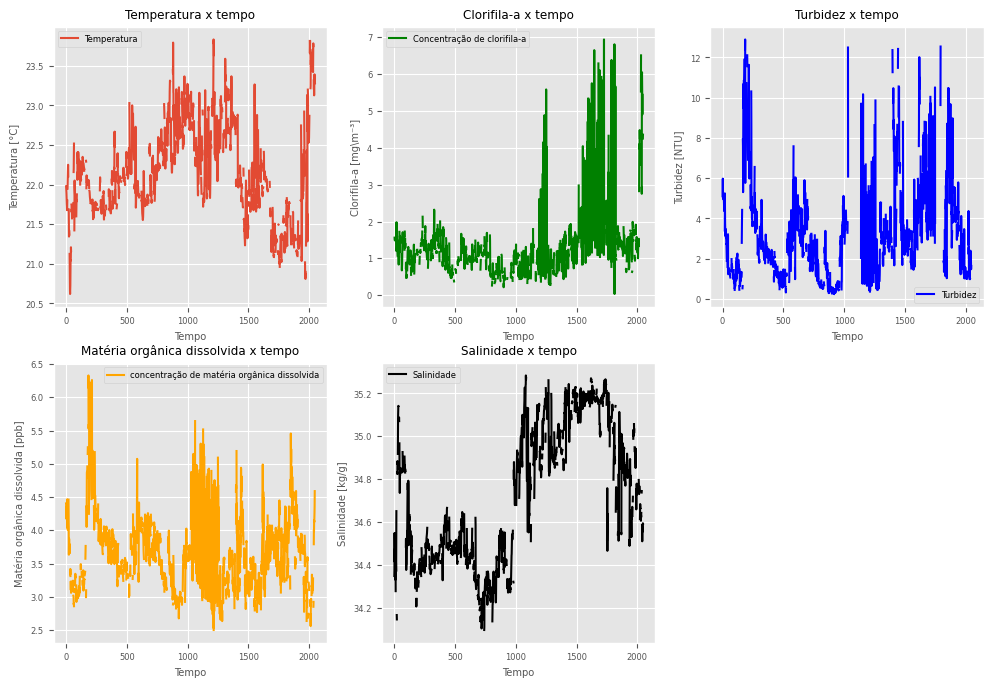

In [38]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 6})

plt.subplot(231)
plt.title('Temperatura x tempo')
plt.xlabel('Tempo')
plt.ylabel('Temperatura [°C]')

plt.plot(T[0,:],label='Temperatura')
plt.legend()
plt.subplot(232)
plt.title('Clorifila-a x tempo')
plt.xlabel('Tempo')
plt.ylabel('Clorifila-a [mg\m⁻³]')

plt.plot(chla[0,:],label='Concentração de clorifila-a',color='green')
plt.legend()
plt.subplot(233)
plt.title('Turbidez x tempo')
plt.xlabel('Tempo')
plt.ylabel('Turbidez [NTU]')

plt.plot(turb[0,:],label='Turbidez',color='b')
plt.legend()
plt.subplot(234)
plt.title('Matéria orgânica dissolvida x tempo')
plt.xlabel('Tempo')
plt.ylabel('Matéria orgânica dissolvida [ppb]')
plt.plot(CDOM[0,:],label='concentração de matéria orgânica dissolvida',color='orange')
plt.legend()
plt.subplot(235)
plt.title('Salinidade x tempo')
plt.xlabel('Tempo')
plt.ylabel('Salinidade [kg/g]')
plt.plot(S[0,:],label='Salinidade',color='black')
plt.legend()

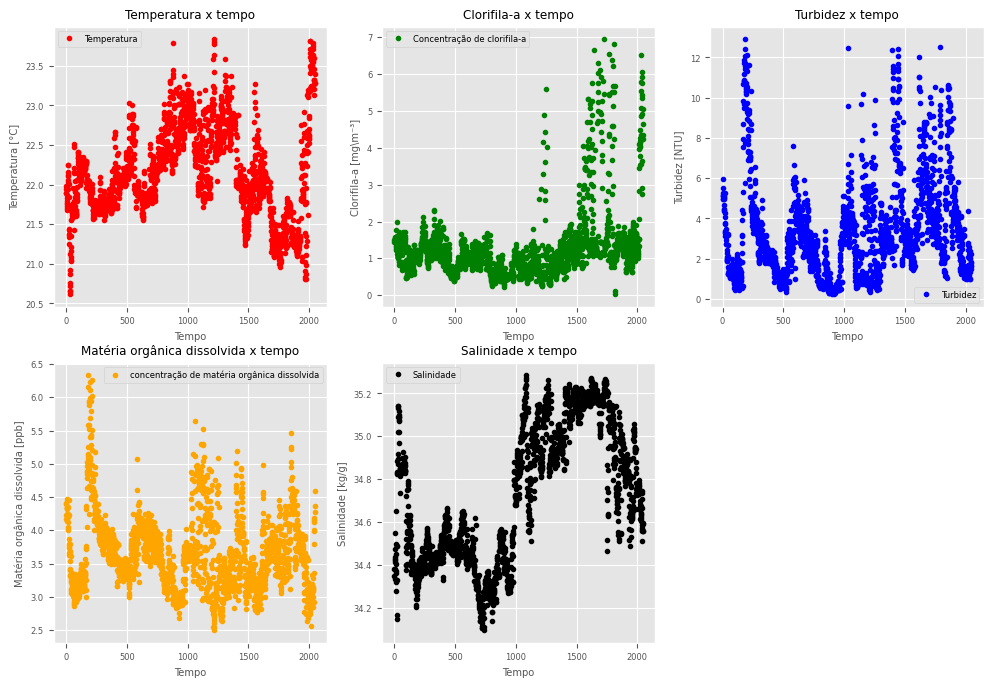

In [43]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 6})

plt.subplot(231)
plt.title('Temperatura x tempo')
plt.xlabel('Tempo')
plt.ylabel('Temperatura [°C]')

plt.plot(Ti,'r.',label='Temperatura')
plt.legend()
plt.subplot(232)
plt.title('Clorifila-a x tempo')
plt.xlabel('Tempo')
plt.ylabel('Clorifila-a [mg\m⁻³]')

plt.plot(chlai,'g.',label='Concentração de clorifila-a')
plt.legend()
plt.subplot(233)
plt.title('Turbidez x tempo')
plt.xlabel('Tempo')
plt.ylabel('Turbidez [NTU]')

plt.plot(turbi,'b.',label='Turbidez')
plt.legend()
plt.subplot(234)
plt.title('Matéria orgânica dissolvida x tempo')
plt.xlabel('Tempo')
plt.ylabel('Matéria orgânica dissolvida [ppb]')
plt.plot(CDOMi,'.',label='concentração de matéria orgânica dissolvida',color='orange')
plt.legend()
plt.subplot(235)
plt.title('Salinidade x tempo')
plt.xlabel('Tempo')
plt.ylabel('Salinidade [kg/g]')
plt.plot(Si,'.',label='Salinidade',color='black')
plt.legend()

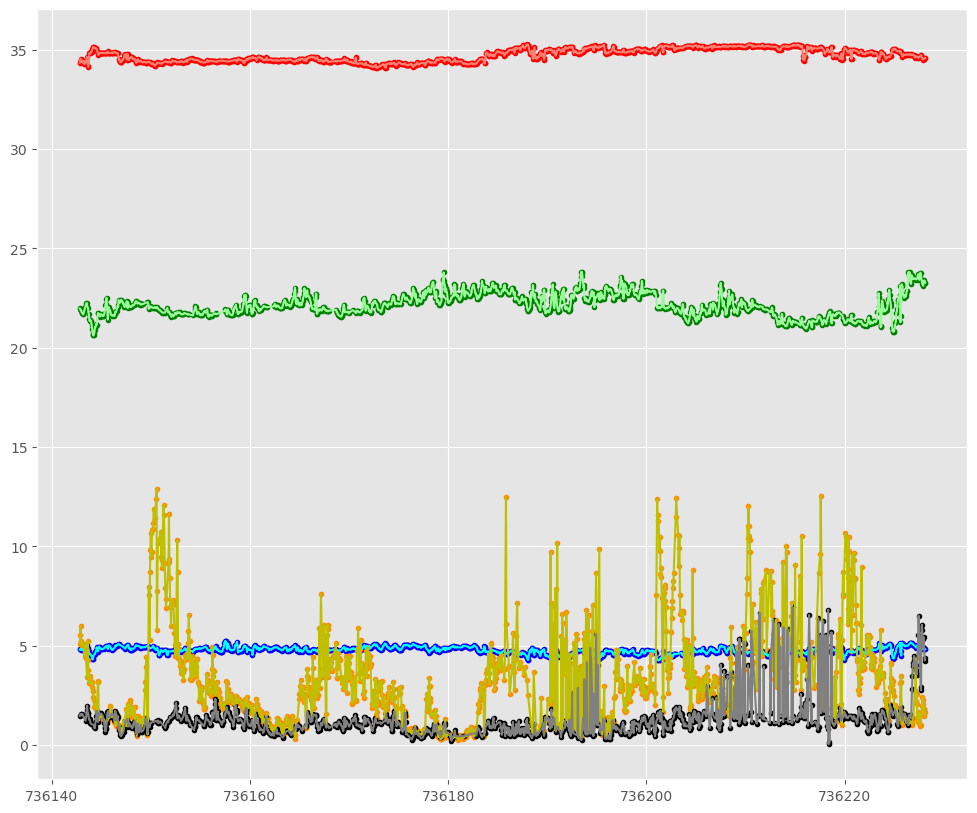

In [7]:
plt.figure(figsize=(12,10))
plt.plot(t,S,'r.',label='Salinidade [g/kg]')
plt.plot(t,T,'g.',label='Temperatura [°C]')
plt.plot(t,DO,'b.',label='DO [mg/m^3]')
plt.plot(t,turb,'.',label='Turbidez [NTU]',color='darkorange')
plt.plot(t,chla,'k.',label='Fluorescência (mg/m^3)')

a1=plt.plot(t[0,:],Si,'salmon',label='Salinidade [g/kg]')
a2=plt.plot(t[0,:],Ti,'palegreen',label='Temperatura [°C]')
a3=plt.plot(t[0,:],DOi,'cyan',label='DO [mg/m^3]')
a4=plt.plot(t[0,:],turbi,'y',label='Turbidez [NTU]')
a5=plt.plot(t[0,:],chlai,'gray',label='Fluorescência (mg/m^3)')



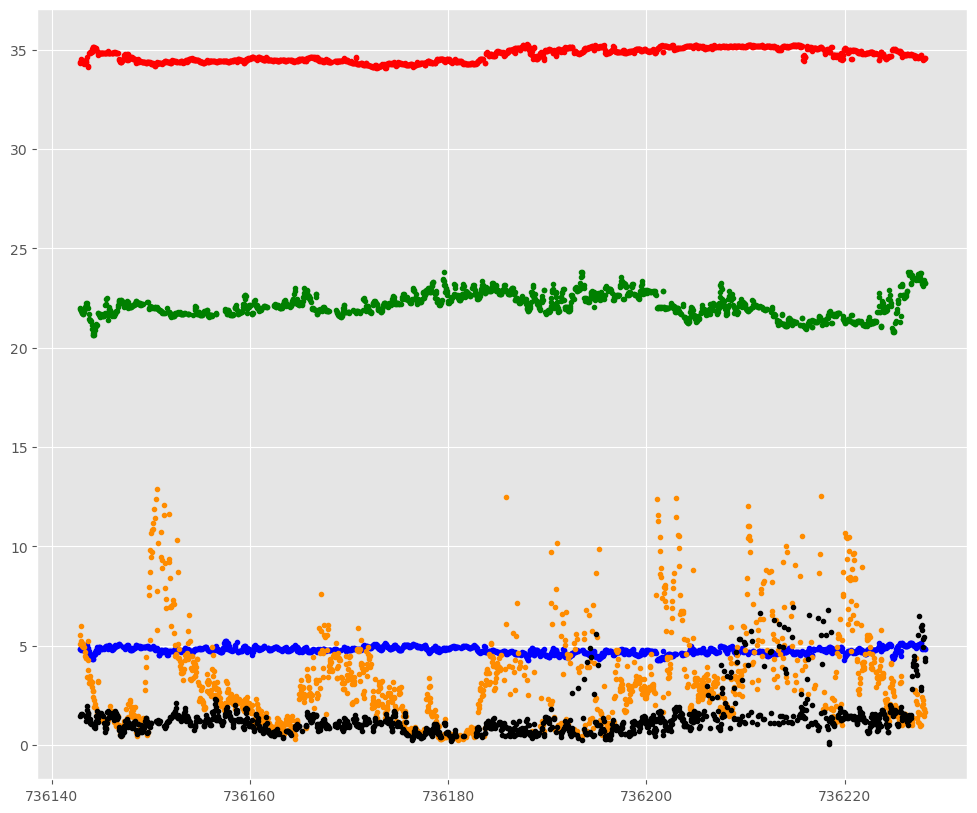

In [8]:
plt.figure(figsize=(12,10))
plt.plot(t,S,'r.',label='Salinidade [g/kg]');
plt.plot(t,T,'g.',label='Temperatura [°C]');
plt.plot(t,DO,'b.',label='DO [mg/m^3]');
plt.plot(t,turb,'.',label='Turbidez [NTU]',color='darkorange');
plt.plot(t,chla,'k.',label='Fluorescência (mg/m^3)');



In [9]:
Sp= pd.Series(Si)

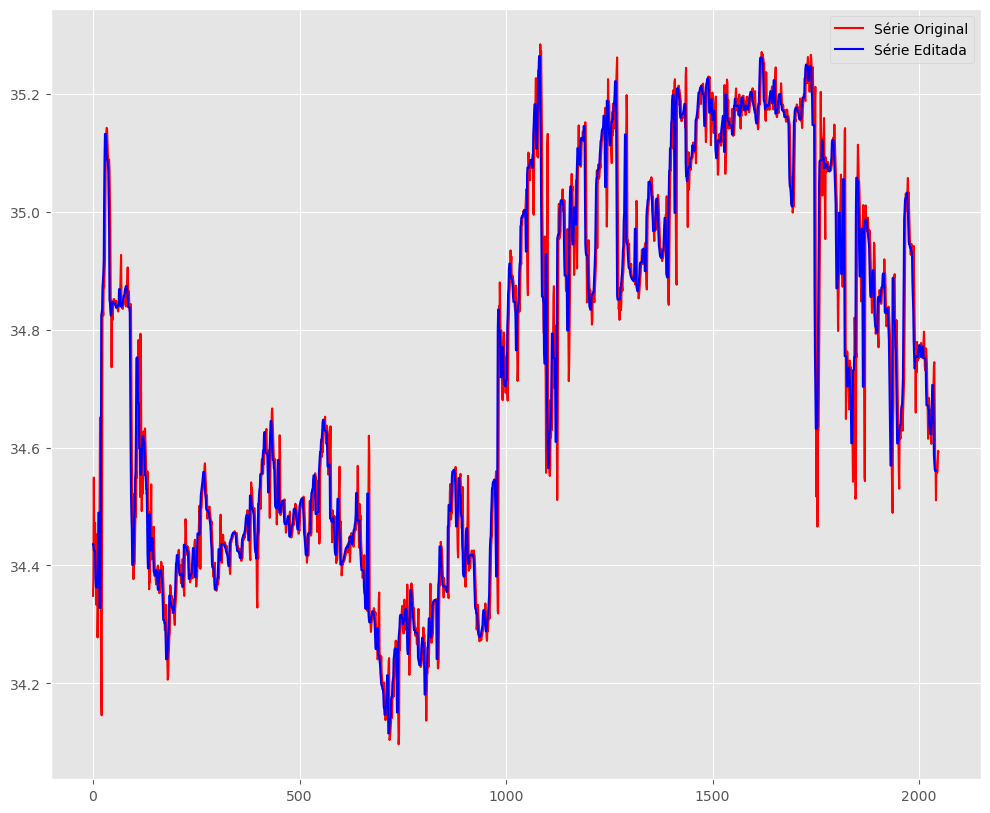

In [10]:
plt.figure(figsize=(12,10))
desvio_padrao = Sp.std()
jan5 = [Sp[i:i+5] for i in range(len(Sp) - 4)]
meio = [sorted(janela)[2] for janela in jan5]
jan3 = [meio[i:i+3] for i in range(len(meio) - 2)]
meio2 = [sorted(janela)[1] for janela in jan3]
meio2 =np.array(meio2)
#plt.subplot(221)
plt.plot(Sp.values,'r-', label='Série Original')
#plt.legend()

#plt.subplot(222)

plt.plot(meio2,'b-' ,label='Série Editada')
plt.legend()


In [11]:
Diferen = np.abs(Sp.values[0:2042] - meio2)
III = np.where(Diferen > 3*desvio_padrao)[0]
X = meio2.copy()
X[III] = Sp[III]

In [45]:
def wildedit(X,const=3):
    Sp = pd.Series(X)
    desvio_padrao = Sp.std()
    jan5 = [Sp[i:i+5] for i in range(len(Sp) - 4)]
    meio = [sorted(janela)[2] for janela in jan5]
    jan3 = [meio[i:i+3] for i in range(len(meio) - 2)]
    meio2 = [sorted(janela)[1] for janela in jan3]
    meio2 =np.array(meio2 )
    Diferen = np.abs(Sp.values[0:2042] - meio2)
    III = np.where(Diferen > 3*desvio_padrao)[0]
    X = meio2.copy()
    X[III] = Sp[III]
    return(X)

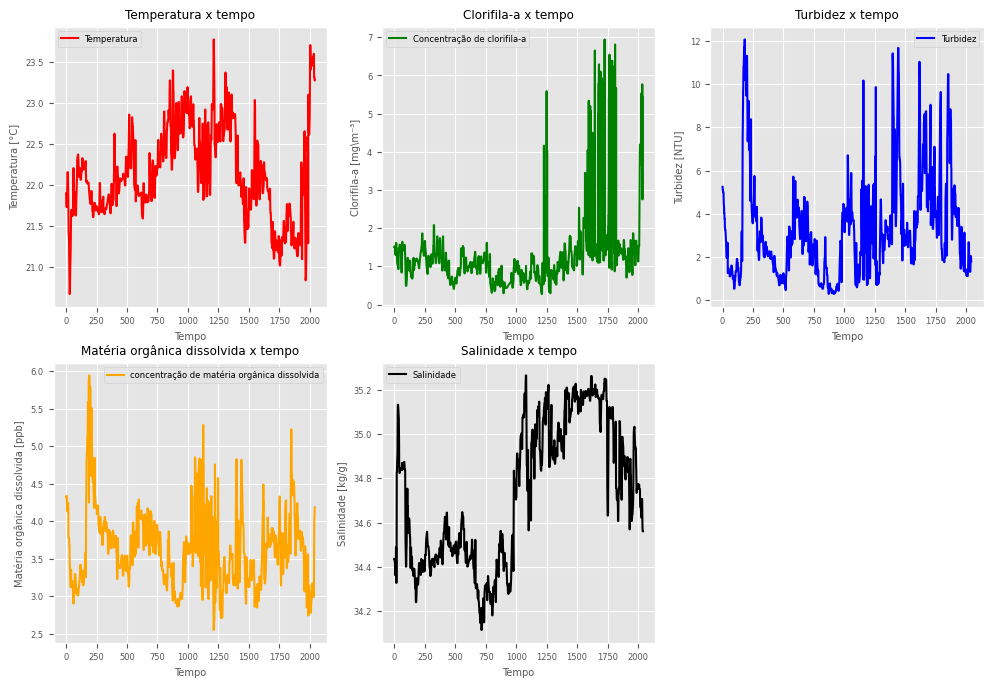

In [47]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 6})

plt.subplot(231)
plt.title('Temperatura x tempo')
plt.xlabel('Tempo')
plt.ylabel('Temperatura [°C]')

plt.plot(wildedit(Ti),'r',label='Temperatura')
plt.legend()
plt.subplot(232)
plt.title('Clorifila-a x tempo')
plt.xlabel('Tempo')
plt.ylabel('Clorifila-a [mg\m⁻³]')

plt.plot(wildedit(chlai),'g',label='Concentração de clorifila-a')
plt.legend()
plt.subplot(233)
plt.title('Turbidez x tempo')
plt.xlabel('Tempo')
plt.ylabel('Turbidez [NTU]')

plt.plot(wildedit(turbi),'b',label='Turbidez')
plt.legend()
plt.subplot(234)
plt.title('Matéria orgânica dissolvida x tempo')
plt.xlabel('Tempo')
plt.ylabel('Matéria orgânica dissolvida [ppb]')
plt.plot(wildedit(CDOMi),label='concentração de matéria orgânica dissolvida',color='orange')
plt.legend()
plt.subplot(235)
plt.title('Salinidade x tempo')
plt.xlabel('Tempo')
plt.ylabel('Salinidade [kg/g]')
plt.plot(wildedit(Si),label='Salinidade',color='black')
plt.legend()

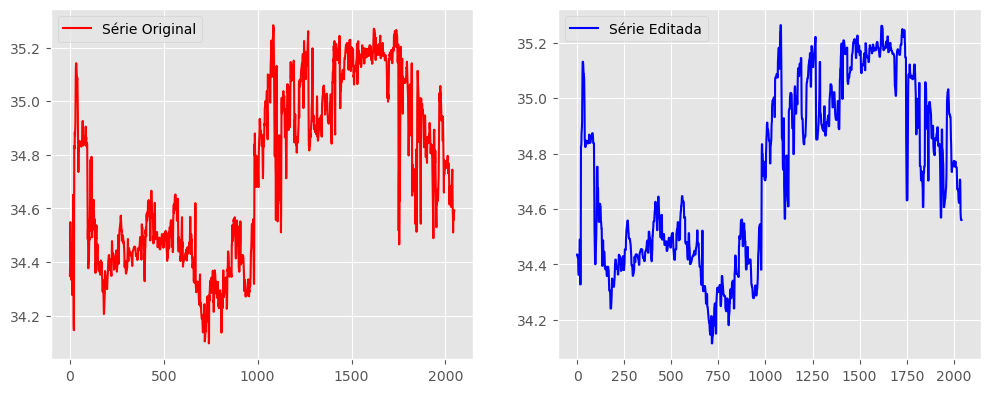

In [13]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.plot(Sp.values,'r-', label='Série Original')
plt.legend()

plt.subplot(222)

plt.plot(X,'b-' ,label='Série Editada')
plt.legend()


In [14]:
x1 = np.random.uniform(size=1000)
x2 = np.random.normal(size=1000)
print(np.mean(x1))
print(np.mean(x2))
print(np.std(x1))
print(np.std(x2))

0.5078455105645585
0.002093563775967848
0.28880044270767036
1.0048406827695038


Text(0.5, 0, 'Uniforme')

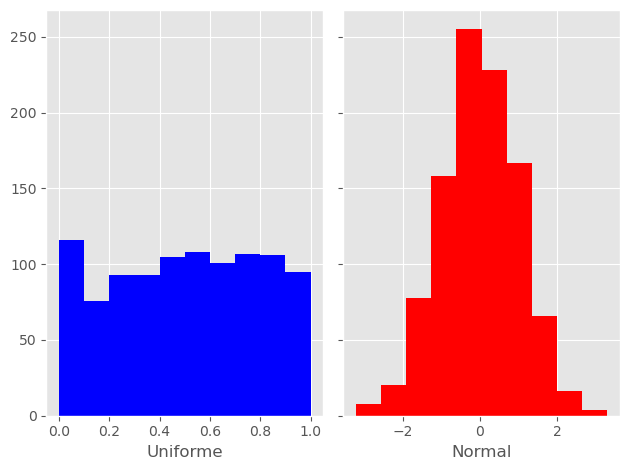

In [15]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(x1,color='blue',label='Uniforme')
axs[1].hist(x2,color='red',label='Normal')
axs[1].set_xlabel('Normal')
axs[0].set_xlabel('Uniforme')

3.383959779057477e-16
1.0


(array([  1.,  14.,  35., 102., 210., 270., 210., 124.,  23.,  11.]),
 array([-3.65050923, -2.983644  , -2.31677877, -1.64991354, -0.9830483 ,
        -0.31618307,  0.35068216,  1.0175474 ,  1.68441263,  2.35127786,
         3.01814309]),
 <BarContainer object of 10 artists>)

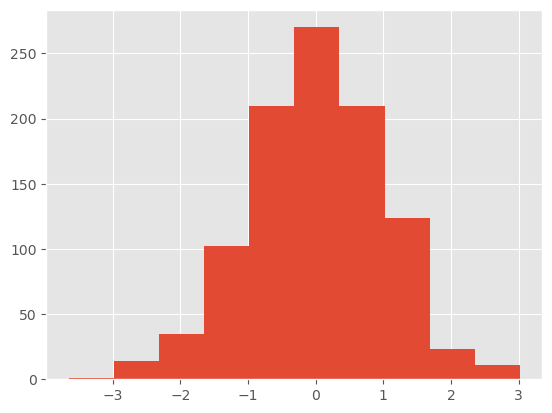

In [16]:
from scipy import stats
temprand = np.random.normal(14.2,4.7,size=1000)
zscores = stats.zscore(temprand)
print(np.mean(zscores))
print(np.std(zscores))
plt.hist(zscores)

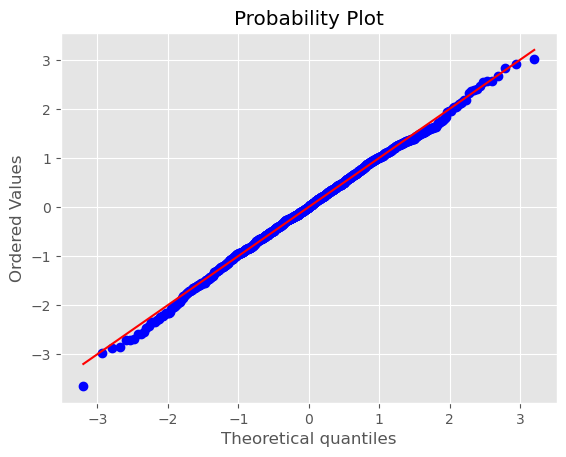

In [17]:
probplot = stats.probplot(zscores, plot=plt)


In [18]:
a30 = np.arange(start=0,stop=30,step=0.1)

In [19]:
a30pdf=stats.norm.pdf(a30,14.2,4.7)

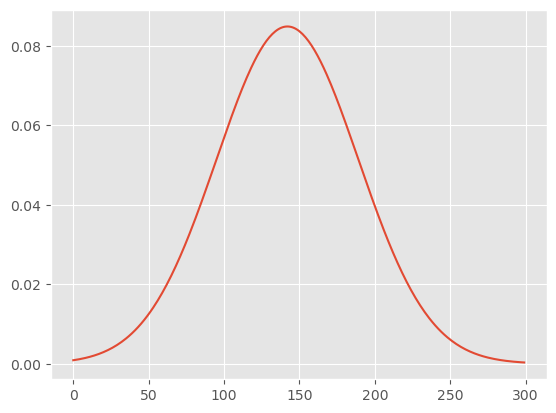

In [20]:
plt.plot(a30pdf)

2.842170943040401e-16
1.0


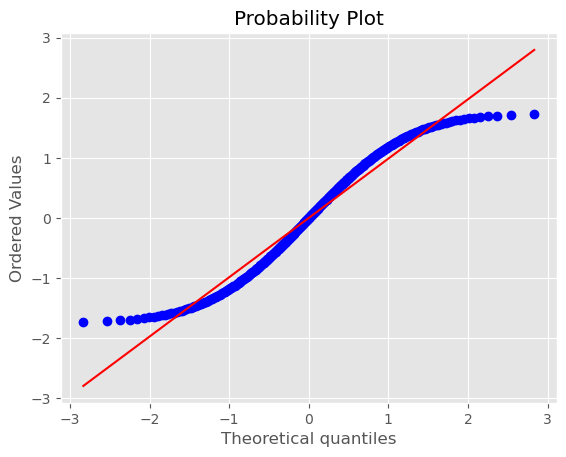

In [21]:
zscores = stats.zscore(a30)
print(np.mean(zscores))
print(np.std(zscores))
probplot = stats.probplot(zscores, plot=plt)


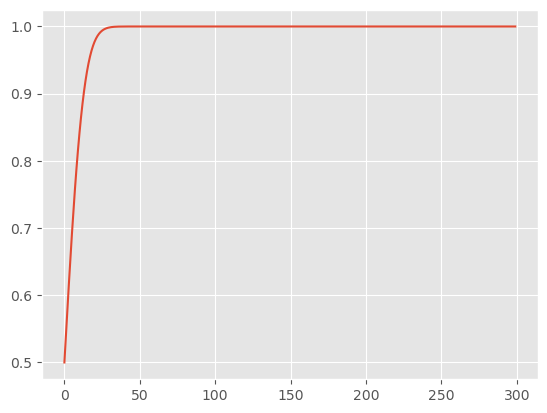

In [22]:
a30cdf=stats.norm.cdf(a30)
plt.plot(a30cdf)
#plt.xlim(20,39)

In [23]:
sm.lilliefors(a30,dist='norm')

(0.058487051889400954, 0.024181666381772493)